# PEC 2. Selección de variables

### Parte 1. Generación de variables artificiales

In [2]:
import numpy as np

Tenemos que generar 5 variables:
- Tres de ella consisten en XOR extendido a tres dimensiones.
- La cuarta variables es un subconjunto de las tres primeras.
- La quinta es una variable booleana aleatoria.

In [3]:
#generamos las 5 variables, para tener al menos nuestro vector base, ya que más adelante la cuarta la cambiaremos por una dependencia
feature_size = 5
n_samples = 100
seed = 12
np.random.seed(seed)
X = np.zeros(shape=(feature_size, n_samples)) #vector base
for i in range(feature_size):
    X[i] = np.random.randint(2, size = n_samples) #aleatoridad

X[3] = (X[1]!=X[2])
X[3] = X[3].astype(int)

In [4]:
#fabricamos nuestra Y. 
y = X[0]!=(X[1]!=X[2])
y = y.astype(int)

La Y queremos que tenga dependencia fuerte de 3 (realmente es XOR, dependiendo de las tres primeras)

In [5]:
X = X.transpose() #hallamos la transpuesta pues porlo general se tienen las variables en columnas y las instancias en filas

In [6]:
print(type(X), type(y))
print(X.shape, y.shape)
print(np.max(X), np.max(y))
print(np.min(X), np.min(y))

<class 'numpy.ndarray'> <class 'numpy.ndarray'>
(100, 5) (100,)
1.0 1
0.0 0


# EDA
Vamos a comenzar con un análisis habitual del conjunto de datos, simulando un caso en que no conociéramos las variables.

In [7]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
dataFeatures = pd.DataFrame(X)

In [9]:
for i in range(feature_size):
    col = dataFeatures.iloc[:, i]
    print(f"\nFrecuencia para {i}:")
    print(col.value_counts())


Frecuencia para 0:
0
1.0    52
0.0    48
Name: count, dtype: int64

Frecuencia para 1:
1
0.0    58
1.0    42
Name: count, dtype: int64

Frecuencia para 2:
2
1.0    51
0.0    49
Name: count, dtype: int64

Frecuencia para 3:
3
0.0    53
1.0    47
Name: count, dtype: int64

Frecuencia para 4:
4
0.0    50
1.0    50
Name: count, dtype: int64


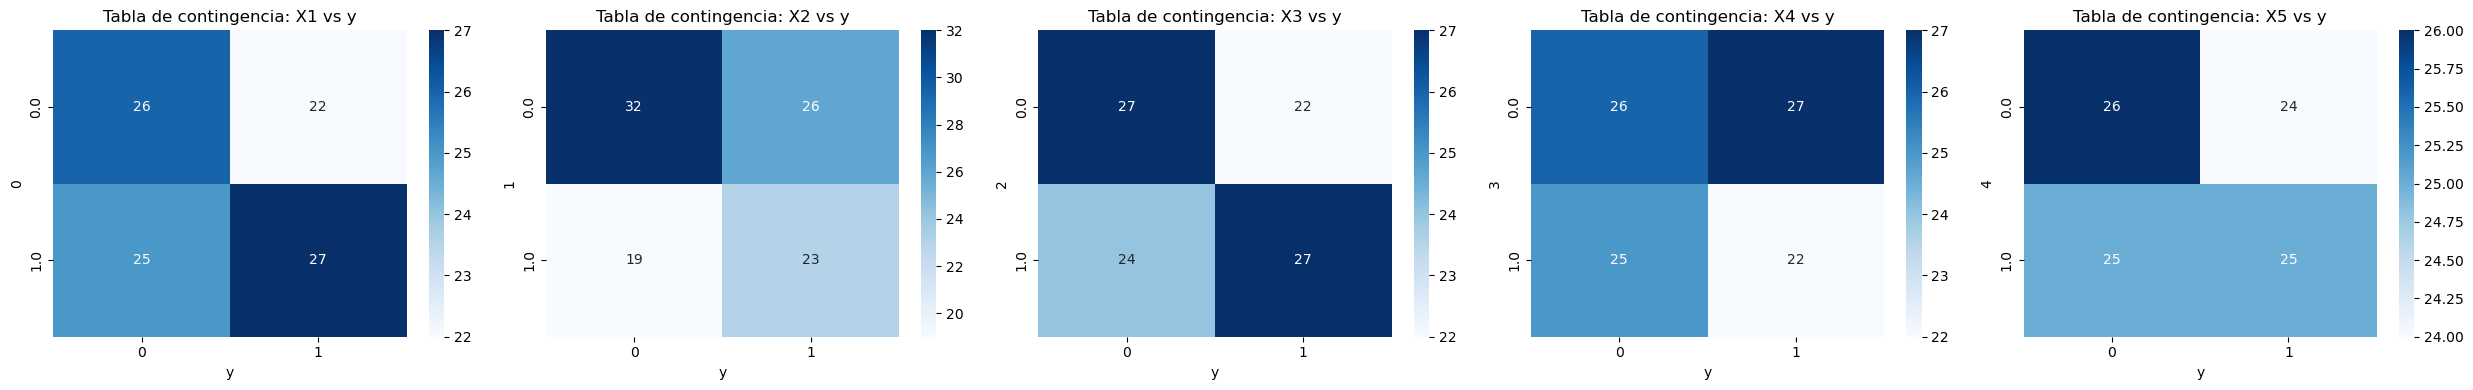

In [10]:
# Tabla de contingencia
fig, axes = plt.subplots(1, feature_size, figsize=(5 * feature_size, 4))  # 1 fila, N columnas

for i, ax in enumerate(axes):
    tabla = pd.crosstab(dataFeatures.iloc[:, i], y)
    
    sns.heatmap(tabla, annot=True, cmap="Blues", fmt="d", ax=ax)
    ax.set_xlabel('y')
    ax.set_ylabel(dataFeatures.columns[i])
    ax.set_title(f'Tabla de contingencia: X{dataFeatures.columns[i]+1} vs y')

plt.tight_layout()
plt.show()

In [11]:
np.unique(y, return_counts=True)

(array([0, 1]), array([51, 49]))

Nuestro variable generada parece tener una mayor inclinación hacia valores negativo que positivos, 57 contra 43. Para un caso perfectamente uniforme y distrbuido de variable binaria serían iguales, pero puede ser normal encontrar conjuntos de datos reales que no estén del todo perfecto distruidos, y al ser un conjunto más pequeño puede afectarle más. Lo tendremos en cuenta a la hora de analizar resultados.

Antes de empezar, vamos a generar nuestro set aleatorio de variables. Como si se puede extraer de forma intrínseca de los datos que son binarios, una distribución aleatoria binaria sería una suposición apropiada.

In [12]:
feature_size_fake = 3
X_fake = np.zeros(shape=(feature_size_fake, n_samples)) #vector base
for i in range(feature_size_fake):
    X_fake[i] = np.random.randint(2, size = n_samples) #aleatoridad

X_fake = X_fake.transpose()

In [13]:
X_fake.shape

(100, 3)

# 1. Coeficientes de correlación.
Usaremos las fórmulas integradas en numpy para hallar el coeficiente de correlación de Pearson

In [14]:
import scipy.stats

In [16]:
list_corr_fake = []
for i in range(feature_size_fake):
    corr, p = scipy.stats.pearsonr(X_fake[:,i], y)
    corr = abs(corr)
    list_corr_fake.append((corr))
    print(corr, p)

0.07768412975903954 0.44234672534401437
0.06181043457406568 0.541253993933778
0.0045114103969016855 0.9644682864543316


In [17]:
list_corr = []
list_diff = []
list_mean = []
list_desv = []
list_estadistico = []
list_pvalue = []
for i in range(feature_size):
    corr, p = scipy.stats.pearsonr(X[:,i], y)
    corr = abs(corr)
    list_corr.append(corr)

    diff0 = corr-list_corr_fake[0]
    diff1 = corr-list_corr_fake[1]
    diff2 = corr-list_corr_fake[2]
    diffs = np.array([diff0, diff1, diff2])
    list_diff.append(diffs)

    media = np.mean(diffs)
    list_mean.append(media)

    desviacion = np.std(diffs)
    list_desv.append(desviacion)

    estadistico = media/(desviacion/np.sqrt(feature_size_fake))
    list_estadistico.append(estadistico)

    list_pvalue.append(scipy.stats.t.sf(abs(estadistico), feature_size_fake))

In [18]:
calc_data = pd.DataFrame([list_corr, list_diff, list_mean, list_desv, list_estadistico, list_pvalue],
             columns = ['X1', 'X2', 'X3', 'X4', 'X5'])

In [19]:
columns = ['correlaciones', 'diferencias', 'media', 'desviaciones', 'estadistico', 'p-value']
calc_data['Nombres'] = columns
calc_data = calc_data.set_index('Nombres')

In [20]:
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

In [21]:
calc_data.sort_values(['correlaciones'], axis = 1, ascending = False)

,X2,X3,X1,X4,X5
Nombres,,,,,
correlaciones,0.098083,0.080432,0.060861,0.041283,0.020004
diferencias,"[0.02039883751171237, 0.03627253269668623, 0.09357155687385023]","[0.0027480431101081226, 0.018621738295081985, 0.07592076247224598]","[-0.016823257921277937, -0.0009495627363040743, 0.05634946144085992]","[-0.03640151157499083, -0.020527816390016967, 0.03677120778714703]","[-0.05768012855863942, -0.041806433373665554, 0.015492590803498442]"
media,0.050081,0.03243,0.012859,-0.006719,-0.027998
desviaciones,0.031428,0.031428,0.031428,0.031428,0.031428
estadistico,2.76006,1.78729,0.708678,-0.370318,-1.543023
p-value,0.035074,0.085928,0.264815,0.367873,0.110253


Se acepta la hipótesis para la variable que más se ha estimado que aporta, X2, y se rechaza para las demás. Si la variable con mejor correlación no tiene mejor aporte que una variabe aleatoria, entonces ninguna realmente, al menos por correlación en este criterio se estima necesaria. En resumen, esto diría que no es diferente de adivinar el resultado. Es posible que la naturaleza binaria de las variables, al tener un 50% de probabilidad, no aporte mucho. He hecho prueba con 1000 y 10000 instancias pero las correlaciones son aún más baja. Para este caso además probé a dejar balanceada la clase y, en los casos en que no estaba los resultados tampoco eran coherentes.

# 2. Criterios de ranking basados en información

In [22]:
def p_frecuencia(var, valor1):
    freq = (var == valor1)
    freq = np.sum(freq)
    return freq
def p_frecuencia2(var, var2, valor1, valor2):
    freq = (var == valor1)*(var2 == valor2)
    freq = np.sum(freq)
    return freq

def Information(var, clase, n_samples):
    valores_var = np.unique(var)
    valores_clase = np.unique(clase)
    info_value = 0
    for i in valores_var:
        for j in valores_clase:
            numerador = p_frecuencia2(var, clase, i, j)/n_samples
            denominador = p_frecuencia(var, i)*(1/n_samples)*p_frecuencia(clase, j)*(1/n_samples)
            sumar = p_frecuencia2(var, clase, i,j)*(1/n_samples)*np.log((numerador/denominador))
            info_value = info_value + sumar
    return info_value

In [23]:
feature_size

5

In [24]:
var_fake_info = []
for i in range(feature_size_fake):
    var_fake_info.append(Information(X_fake[:,i], y, n_samples))

In [25]:
var_info = []
list_diff = []
list_mean = []
list_desv = []
list_estadistico = []
list_pvalue = []
for i in range(feature_size):
    valor = Information(X[:,i], y, n_samples)
    var_info.append(valor)

    diff0 = valor-var_fake_info[0]
    diff1 = valor-var_fake_info[1]
    diff2 = valor-var_fake_info[2]
    diffs = np.array([diff0, diff1, diff2])
    list_diff.append(diffs)

    media = np.mean(diffs)
    list_mean.append(media)

    desviacion = np.std(diffs)
    list_desv.append(desviacion)

    estadistico = media/(desviacion/np.sqrt(feature_size_fake))
    list_estadistico.append(estadistico)

    list_pvalue.append(scipy.stats.t.sf(abs(estadistico), feature_size_fake))

In [26]:
calc_data_information = pd.DataFrame([var_info, list_diff, list_mean, list_desv, list_estadistico, list_pvalue],
             columns = ['X1', 'X2', 'X3', 'X4', 'X5'])
columns = ['information', 'diferencias', 'media', 'desviaciones', 'estadistico', 'p-value']
calc_data_information['Nombres'] = columns
calc_data_information = calc_data_information.set_index('Nombres')

In [27]:
calc_data_information.sort_values(['information'], axis = 1, ascending = False)

,X2,X3,X1,X4,X5
Nombres,,,,,
information,0.004817,0.003238,0.001853,0.000852,0.0002
diferencias,"[0.0017969294464942852, 0.0029048753469685246, 0.004806469185706194]","[0.00021859865666714468, 0.001326544557141384, 0.0032281383958790537]","[-0.0011664184798898213, -5.847257941558187e-05, 0.001843121259322088]","[-0.0021672865681121, -0.0010593406676378606, 0.0008422531710998093]","[-0.002819623069347234, -0.0017116771688729946, 0.00018991666986467527]"
media,0.003169,0.001591,0.000206,-0.000795,-0.001447
desviaciones,0.001243,0.001243,0.001243,0.001243,0.001243
estadistico,4.417132,2.21746,0.287203,-1.107677,-2.016818
p-value,0.010769,0.056655,0.396326,0.174415,0.068538


# 3. Single Variable Classifier

In [28]:
from sklearn import linear_model #importamos el modelo
from sklearn.model_selection import train_test_split

In [29]:
#Clasificador lineal
def Regresion(X_train, y_train):
    reg = linear_model.LogisticRegression(solver='liblinear', multi_class='ovr') #utilizamos un clasificador simple, ahora no nos interesa tanto usar un modelo adecuado tanto como evaluar si lo es
    reg = linear_model.Perceptron() 
    reg.fit(X_train.reshape(-1,1), y_train) #adaptamos modelo
    
    return reg

In [30]:
regress_fake = []
test_size = 0.1
for i in range(feature_size_fake):
    X_train, X_test, y_train, y_test = train_test_split(X_fake[:,i], y, test_size = test_size, shuffle = True)
    reg = Regresion(X_train, y_train)
    puntuacion = reg.score(X_test.reshape(-1,1), y_test)
    regress_fake.append(puntuacion)

In [31]:
regress_fake

[0.5, 0.2, 0.6]

In [32]:
regress = []
for i in range(feature_size):
    X_train, X_test, y_train, y_test = train_test_split(X[:,i], y, test_size = test_size, shuffle = True)
    reg = Regresion(X_train, y_train)
    puntuacion = reg.score(X_test.reshape(-1,1), y_test)
    regress.append(puntuacion)

In [33]:
regress

[0.6, 0.3, 0.6, 0.6, 0.2]

# 4. PCA

No vamos a limitar la búsqueda autovectores y autovalores cogiendo los m más grandes porque es un dataset pequeño y no es necesario, ya que obtenemos un ranking.

In [34]:
# X es de forma (n, p)
X_centered = X - np.mean(X, axis=0) #centramos para hallar varianzas entorno a 0.

# Matriz de covarianzas
cov_matrix = np.cov(X_centered, rowvar=False)

print("Matriz de covarianzas:")
print(cov_matrix)

Matriz de covarianzas:
[[ 0.25212121  0.02181818  0.02505051  0.00565657 -0.01010101]
 [ 0.02181818  0.24606061  0.0159596  -0.00747475 -0.02020202]
 [ 0.02505051  0.0159596   0.25242424  0.04070707 -0.02525253]
 [ 0.00565657 -0.00747475  0.04070707  0.25161616 -0.01515152]
 [-0.01010101 -0.02020202 -0.02525253 -0.01515152  0.25252525]]


In [35]:
eigvals, eigvecs = np.linalg.eigh(cov_matrix)


# Ordenar de mayor a menor
idx = np.argsort(eigvals)[::-1]
eigvals = eigvals[idx]
eigvecs = eigvecs[:, idx]

# Componentes principales
print("Autovalores (varianza explicada):", eigvals)
print("Autovectores (componentes principales):", eigvecs)

Autovalores (varianza explicada): [0.32449167 0.26624169 0.24146188 0.21873714 0.20381509]
Autovectores (componentes principales): [[-0.39750151 -0.4029717  -0.64160038 -0.4914326   0.16263244]
 [-0.30718468 -0.61600144  0.15084586  0.65044943  0.28344464]
 [-0.60457657  0.21256888 -0.13583231  0.25691519 -0.71052503]
 [-0.42948701  0.63241952 -0.08365224  0.14412007  0.62275048]
 [ 0.44458768  0.1140879  -0.73494651  0.49863166 -0.02336333]]


In [ ]:
contribuciones = sum(abs(eigvecs))
d = np.argsort(-contribuciones) #le hemos puesto un - porque argsort no tiene argumento para orden inverso
ranking = contribuciones[d]

In [68]:
ranking

array([2.18333745, 2.04154894, 1.97804944, 1.80271592, 1.74687729])

Esto significa que la que más contribuye es X1, seguida de X4, X2, X5 (la aleatoria) y finalmente la X3. Que X1 y X4 tengan más contribución parece razonable, aunque en PCA no estamos teniendo en cuenta la variabla de clase. Si bien, ¿es posible que esto arroje información sobre la contribución intrínseca de la variable? En ocasiones los 0 puede alterar inapropiadamente los cálculo al dar valores nulos. También puede verse afectado por los cambios en las otras, puede existir casos en que los variables no "discriminen" correctamente porque tienen pocos casos en que sea el valor que se diferencia (por ejemplo, ser 1 frente a lo demás 0 y viceversa). Es poco probable que sea por magnitud porque todas van de 0 a 1.

# 5. wrappers

In [ ]:
import itertools

# nota: para este algoritmo en particular (Branch and Bound) no sabía inicialmente 
# cómo aproximar la programación. La base del algoritmo de búsqueda la obtuve de ChatGPT, 
# pero en esa versión inicial no se aplicaban ni poda, ni criterios de evaluación, ni límites, ni inicialización adecuada, ni cálculo de score. 
# En otros casos suelo usar ChatGPT únicamente para corregir errores o explorar funciones alternativas, pero 
# dado que aquí la base surgió así (y no de un tutorial, documentación, implementación directa o reciclaje de código) me pareció importante indicarlo.
def branch_and_bound(features, m, eval_func):
    """
    Branch and Bound para selección de características.
    """
    best_subset = None
    best_score = float("-inf")

    #Inicialización
    bound = 0 #eval_func(features)  # Bound inicial
    list_i_inicial = []
    avail_inicial = features
    sucesor_incial = m + 1

    def bound_estimate(current_subset, remaining, m, eval_func):
        """
        Bound heurístico: asume que el mejor score posible es el actual
        más las mejores mejoras individuales de las features restantes.
        """
        # Score actual
        score_now = eval_func(current_subset) if current_subset else float("-inf")
        if len(current_subset) == 0:
            score_now = 0  # nodo vacío
        # Mejoras individuales de features disponibles
        scores_remaining = [eval_func(current_subset + [f]) for f in remaining]
        top_k = sorted(scores_remaining, reverse=True)[:m - len(current_subset)]
        return score_now + sum(top_k) if top_k else score_now

    def search(list_i, avail, bound): #list_i es el subcojunto siendo evaluado, avail son las feature restantes
        nonlocal best_subset, best_score
        if len(list_i) > 0:
            score = eval_func(list_i)
            if score > best_score: #vamos sustituyendo los mejores valores
                best_score = score
                best_subset = list_i.copy()
        if len(list_i) == m: #paramos al llegar al máximo
            return
        bound = bound_estimate(list_i, avail, m, eval_func)
        if bound < best_score:
            print('poda')
            return
        for i, f in enumerate(avail):
            new_list_i =list_i + [f]
            new_avail = avail[i+1:]
            search(new_list_i, new_avail, bound)

    search(list_i_inicial, avail_inicial, bound)
    return best_subset, best_score

In [119]:
import matplotlib.pyplot as plt
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [120]:
def Knn_classification(X, y):
    test_size = 0.2
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size, shuffle = True)
    #creamos una pipeline que escale nuestros datos, pues knn es sensible a ello
    clf = Pipeline(steps=[
        ("knn", KNeighborsClassifier(n_neighbors=11))
    ])
    clf.fit(X_train, y_train)
    return clf, X_test, y_test

In [129]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)

# Criterio de evaluación
def evaluation(subset):
    X_train_sel = X_train[:, subset]
    X_test_sel  = X_test[:, subset]
    clf = KNeighborsClassifier(n_neighbors=3)
    clf.fit(X_train_sel, y_train)
    return clf.score(X_test_sel, y_test)  # negativo porque branch_and_bound busca minimizar

# Features disponibles
features = list(range(X.shape[1]))

# Ejecutar branch & bound
best, score = branch_and_bound(features, m=3, eval_func=evaluation)

print("Mejor subconjunto:", best)
print("Score:", score)  # lo revertimos para ver la accuracy

Mejor subconjunto: [0, 1, 2]
Score: 1.0


In [41]:
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

1.0

In [42]:
clf.fit(X_train[:,:-1], y_train)
clf.score(X_test[:,:-1], y_test)

1.0

In [43]:
clf.fit(X_train[:,:3], y_train)
clf.score(X_test[:,:3], y_test)

1.0

In [44]:
X_train[:,:3].shape

(80, 3)

In [45]:
clf.fit(X_train[:,1:], y_train)
clf.score(X_test[:,1:], y_test)

0.45